In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(11)

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

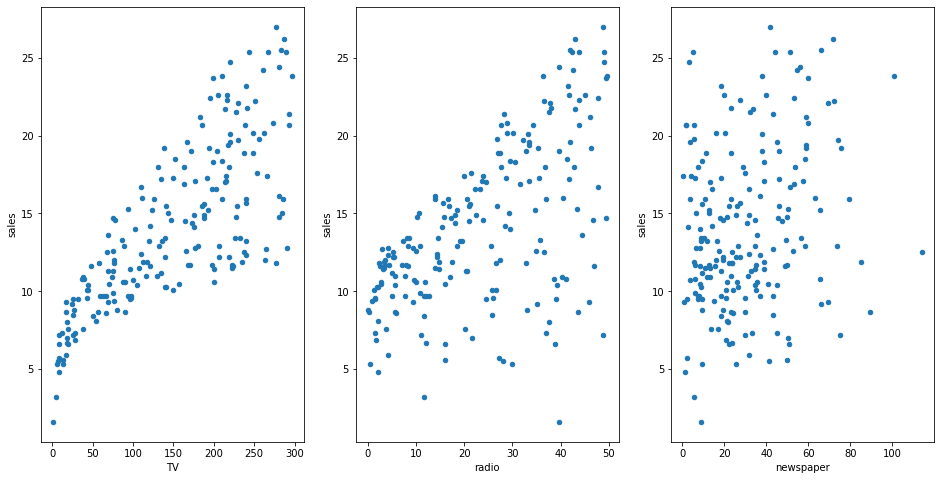

In [5]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

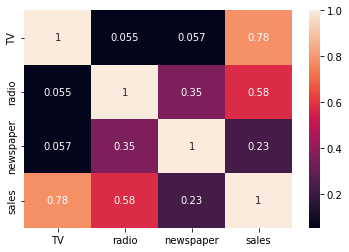

In [6]:
sns.heatmap(data.corr(), annot = True);

In [7]:
features = data[['TV']].values
target = data[['sales']].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 6)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
my_first_model = LinearRegression()

At this stage my m and c values are initialized to some random value. We need to train the model to find the optimal value of the weights(parameters) of the Linear Regression model.

In [13]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [14]:
my_first_model.coef_

array([[0.04873499]])

In [15]:
my_first_model.intercept_

array([6.70910349])

### Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales

OR 

An additional 1000 $ spent on TV was associated with an increase in sales of 48.734 units 

### Inference
y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on TV is $50,000. I want you to tell me the sales generated due to this spend

In [16]:
.048*50 + 6.709

9.109

Lets try to plot best fit line

In [17]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [18]:
preds = my_first_model.predict(X_new)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


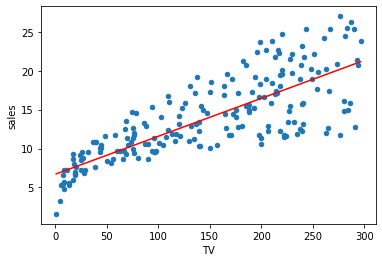

In [19]:
data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new,preds,c='red');

In [20]:
import statsmodels.formula.api as smf

In [21]:
my_stat_model = smf.ols(formula='sales ~ TV', data=data).fit()
my_stat_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

H0 : There is no relationship between independent(TV) variable and dependent(sales) variable

H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

if my p value for TV is less than .05 then I will reject the null hypothesis

In [22]:
my_stat_model.rsquared

0.611875050850071

To complete the supervised learning flow follow the below steps after fitting the model

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Evaluation on Train Data

In [24]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 2.559717184958041
MSE on Train Data : 10.89210545248742
RMSE on Train Data : 3.300318992535028
R-squared on Train Data : 0.6232434761028465


### Evaluation on Test Data

In [25]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Train Data : 2.469197684055691
MSE on Train Data : 9.50319169686634
RMSE on Train Data : 3.082724719605424
R-squared on Train Data : 0.5600153407297689


### Multiple Linear Regression

In [26]:
features = data[['TV','radio','newspaper']]
target = data[['sales']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 10, train_size = .80)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [29]:
my_multiple_linear_model = LinearRegression()

In [30]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [32]:
my_multiple_linear_model.coef_

array([[ 0.0437726 ,  0.19343299, -0.00222879]])

In [33]:
my_multiple_linear_model.intercept_

array([3.25409711])

### Evaluation on Train data

In [34]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492499
RMSE on Train Data : 1.3633035872281896
R-squared on Train Data : 0.9209087553499528


### Evaluation on Test Data

In [34]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))

MAE on Train Data : 1.8850130310423148
MSE on Train Data : 6.700486756528875
RMSE on Train Data : 2.58852984462781
R-squared on Train Data : 0.8353672324670594


### Use of OLS model for multiple linear regression

In [35]:
my_ols_model = smf.ols(formula='sales ~ TV + radio + newspaper', data = data).fit()

In [36]:
my_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        16:43:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""